#  [Tarea 09] Ejercicios Unidad 04-A-B | Eliminación gaussiana vs Gauss-Jordan
### nombre: Francisco Adrian Correa Anrango
### Fecha : 08/01/2025


link de github: https://github.com/afca2002/-Tarea-09-Ejercicios-Unidad-04-A-B-Eliminaci-n-gaussiana-vs-Gauss-Jordan.git
## Indicaciones:
* Puede realizar los cálculos a mano, o utilizar cualquier librería o implementar su propia función. 
* En caso de usar código, subir la resolución de los ejercicios en un repositorio público en Github e incluir enlace de su repositorio.  
* Subir archivo pdf.

 Para cada uno de los siguientes sistemas lineales, obtenga, de ser posible, una solución con métodos gráficos. 
Explique los resultados desde un punto de vista geométrico.



#### Sistema a
$$
\begin{aligned}
    x_1 + 2x_2 &= 0 \\
    x_1 - x_2 &= 0
\end{aligned}
$$

#### Sistema b
$$
\begin{aligned}
    x_1 + 2x_2 &= 3 \\
    -2x_1 - 4x_2 &= 6
\end{aligned}
$$

#### Sistema c
$$
\begin{aligned}
    2x_1 + x_2 &= -1 \\
    x_1 + x_2 &= 2 \\
    x_1 - 3x_2 &= 5
\end{aligned}
$$

#### Sistema d
$$
\begin{aligned}
    2x_1 + x_2 + x_3 &= 1 \\
    2x_1 + 4x_2 - x_3 &= -1
\end{aligned}
$$

Solución (a): (np.float64(0.0), np.float64(-0.0))


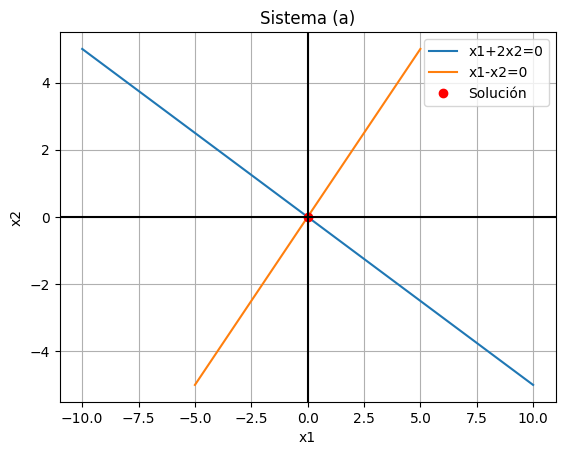

In [4]:
# Ecuacion A)

import numpy as np
import matplotlib.pyplot as plt

def gauss_elimination_2x2(A, b):
    A = A.astype(float)
    b = b.astype(float)
    if abs(A[0,0]) < 1e-12:
        A[[0,1]] = A[[1,0]]
        b[[0,1]] = b[[1,0]]
    if abs(A[0,0]) < 1e-12:
        print("Pivote nulo.")
        return None
    f = A[1,0]/A[0,0]
    A[1,1] -= f * A[0,1]
    b[1]   -= f * b[0]
    if abs(A[1,1]) < 1e-12:
        if abs(b[1]) > 1e-12:
            print("No hay solución.")
            return None
        else:
            print("Infinitas soluciones.")
            return None
    x2 = b[1]/A[1,1]
    x1 = (b[0] - A[0,1]*x2)/A[0,0]
    return (x1, x2)

A_a = np.array([[1, 2],
                [1, -1]])
b_a = np.array([0, 0])
sol_a = gauss_elimination_2x2(A_a, b_a)
if sol_a is not None:
    x1_a, x2_a = sol_a
    print("Solución (a):", (x1_a, x2_a))
    x2_vals = np.linspace(-5, 5, 100)
    x1_line1 = -2*x2_vals
    x1_line2 = x2_vals
    plt.plot(x1_line1, x2_vals, label="x1+2x2=0")
    plt.plot(x1_line2, x2_vals, label="x1-x2=0")
    plt.plot(x1_a, x2_a, 'ro', label="Solución")
    plt.axhline(0, color='black')
    plt.axvline(0, color='black')
    plt.xlabel("x1")
    plt.ylabel("x2")
    plt.legend()
    plt.title("Sistema (a)")
    plt.grid(True)
    plt.show()


No hay solución.
Sin solución (b).


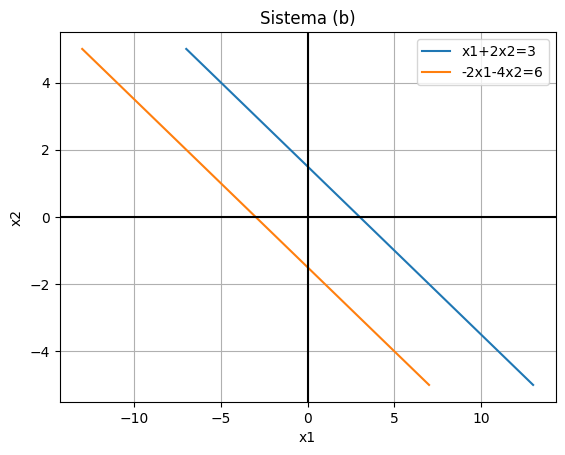

In [5]:
# Ecuacion B) 
import numpy as np
import matplotlib.pyplot as plt

def gauss_elimination_2x2(A, b):
    A = A.astype(float)
    b = b.astype(float)
    if abs(A[0,0]) < 1e-12:
        A[[0,1]] = A[[1,0]]
        b[[0,1]] = b[[1,0]]
    if abs(A[0,0]) < 1e-12:
        print("Pivote nulo.")
        return None
    f = A[1,0]/A[0,0]
    A[1,1] -= f * A[0,1]
    b[1]   -= f * b[0]
    if abs(A[1,1]) < 1e-12:
        if abs(b[1]) > 1e-12:
            print("No hay solución.")
            return None
        else:
            print("Infinitas soluciones.")
            return None
    x2 = b[1]/A[1,1]
    x1 = (b[0] - A[0,1]*x2)/A[0,0]
    return (x1, x2)

A_b = np.array([[1, 2],
                [-2, -4]])
b_b = np.array([3, 6])
sol_b = gauss_elimination_2x2(A_b, b_b)
if sol_b is not None:
    x1_b, x2_b = sol_b
    print("Solución (b):", (x1_b, x2_b))
else:
    print("Sin solución (b).")

x2_vals = np.linspace(-5, 5, 100)
x1_line1_b = 3 - 2*x2_vals
x1_line2_b = -3 - 2*x2_vals
plt.plot(x1_line1_b, x2_vals, label="x1+2x2=3")
plt.plot(x1_line2_b, x2_vals, label="-2x1-4x2=6")
plt.axhline(0, color='black')
plt.axvline(0, color='black')
plt.xlabel("x1")
plt.ylabel("x2")
plt.legend()
plt.title("Sistema (b)")
plt.grid(True)
plt.show()


No hay solución.
Sin solución (c).


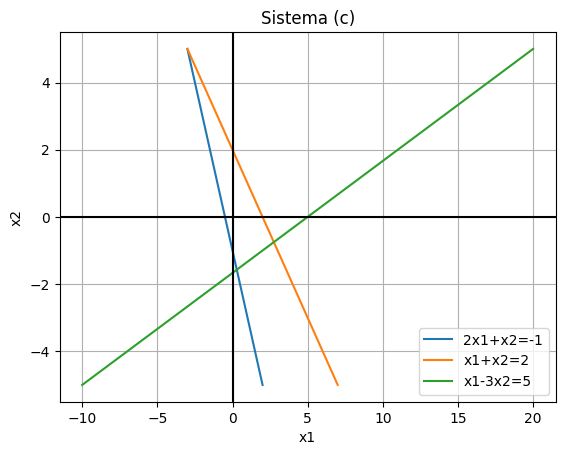

In [6]:
# Ecuacion C)
import numpy as np
import matplotlib.pyplot as plt

def gauss_elimination_3x2(A, b):
    A = A.astype(float)
    b = b.astype(float)
    aug = np.column_stack((A, b))
    if abs(aug[0,0]) < 1e-12:
        for i in range(1,3):
            if abs(aug[i,0]) > 1e-12:
                aug[[0,i]] = aug[[i,0]]
                break
    for i in range(1,3):
        if abs(aug[0,0]) > 1e-12:
            f = aug[i,0]/aug[0,0]
            aug[i] = aug[i] - f*aug[0]
    if abs(aug[1,1]) < 1e-12:
        if abs(aug[2,1]) > 1e-12:
            aug[[1,2]] = aug[[2,1]]
    if abs(aug[1,1]) > 1e-12:
        f = aug[2,1]/aug[1,1]
        aug[2] = aug[2] - f*aug[1]
    if abs(aug[2,0])<1e-12 and abs(aug[2,1])<1e-12:
        if abs(aug[2,2])>1e-12:
            print("No hay solución.")
            return None
        else:
            print("Infinitas o redundante.")
            return None
    if abs(aug[1,1]) < 1e-12:
        print("No hay solución única.")
        return None
    x2 = aug[1,2]/aug[1,1]
    x1 = (aug[0,2] - aug[0,1]*x2)/aug[0,0]
    print("Advertencia: 3x2.")
    return (x1, x2)

A_c = np.array([[ 2,  1],
                [ 1,  1],
                [ 1, -3]])
b_c = np.array([-1, 2, 5])
sol_c = gauss_elimination_3x2(A_c, b_c)
if sol_c is not None:
    print("Solución (c):", sol_c)
else:
    print("Sin solución (c).")

x2_vals = np.linspace(-5, 5, 100)
x1_line1_c = (-1 - x2_vals)/2.0
x1_line2_c = 2 - x2_vals
x1_line3_c = 5 + 3*x2_vals
plt.plot(x1_line1_c, x2_vals, label="2x1+x2=-1")
plt.plot(x1_line2_c, x2_vals, label="x1+x2=2")
plt.plot(x1_line3_c, x2_vals, label="x1-3x2=5")
plt.axhline(0, color='black')
plt.axvline(0, color='black')
plt.xlabel("x1")
plt.ylabel("x2")
plt.legend()
plt.title("Sistema (c)")
plt.grid(True)
plt.show()


Resultado (d): Infinitas soluciones


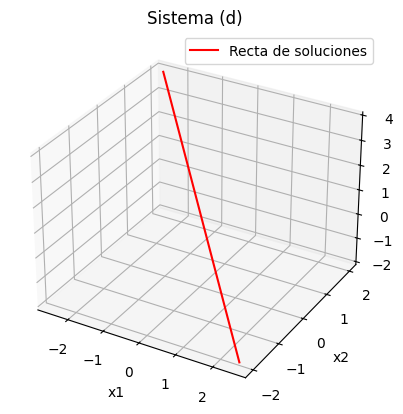

In [7]:
# Ecuacion D)
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def gauss_elimination_2x3(A, b):
    A = A.astype(float)
    b = b.astype(float)
    aug = np.column_stack((A, b))
    if abs(aug[0,0]) < 1e-12:
        if abs(aug[1,0]) > 1e-12:
            aug[[0,1]] = aug[[1,0]]
    if abs(aug[0,0]) > 1e-12:
        f = aug[1,0]/aug[0,0]
        aug[1] = aug[1] - f*aug[0]
    if abs(aug[1,0])<1e-12 and abs(aug[1,1])<1e-12 and abs(aug[1,2])<1e-12:
        if abs(aug[1,3])>1e-12:
            return "No hay solución"
        else:
            return "Infinitas soluciones"
    else:
        return "Infinitas soluciones"

A_d = np.array([[ 2, 1,  1],
                [ 2, 4, -1]])
b_d = np.array([ 1, -1])
res_d = gauss_elimination_2x3(A_d, b_d)
print("Resultado (d):", res_d)

t_vals = np.linspace(-2, 2, 50)
x1_vals = -5/4 * t_vals
x2_vals = t_vals
x3_vals = 1 + (3/2)*t_vals
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot(x1_vals, x2_vals, x3_vals, 'r', label='Recta de soluciones')
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('x3')
ax.legend()
ax.set_title("Sistema (d)")
plt.show()


## Ejercicio 2
Utilice la eliminación gaussiana con sustitución hacia atrás y aritmética de redondeo de dos dígitos para resolver los siguientes sistemas lineales. **No reordene las ecuaciones.**

(La solución exacta para cada sistema es \(x_1 = -1\), \(x_2 = 2\), \(x_3 = 3\)).

### Sistema a:
$$
\begin{aligned}
    -x_1 + 4x_2 + x_3 &= 8 \\
    \frac{5}{3}x_1 + \frac{2}{3}x_2 + \frac{2}{3}x_3 &= 1 \\
    2x_1 + x_2 + 4x_3 &= 11
\end{aligned}
$$

### Sistema b:
$$
\begin{aligned}
    4x_1 + 2x_2 - x_3 &= -5 \\
    \frac{1}{9}x_1 + \frac{1}{9}x_2 - \frac{1}{3}x_3 &= -1 \\
    x_1 + 4x_2 + 2x_3 &= 9
\end{aligned}
$$

In [9]:
def rd(x):
    
    return float(f"{x:.2f}")

def gauss_elim_3x3_2dec(mat):
    
    # mat es una lista de listas o un np.array con shape (3,4).
    # Primer pivote: fila 0
    p = mat[0][0]  # pivote de la fila 0
    # Eliminamos x1 de filas 1 y 2
    for i in range(1,3):
        if abs(p) > 1e-12:  
            factor = rd(mat[i][0]/p)
        else:
            factor = 0
        # mat[i] = mat[i] - factor*mat[0]
        for j in range(4):
            mat[i][j] = rd(mat[i][j] - factor*mat[0][j])
    
    # Segundo pivote: fila 1
    p = mat[1][1] 
    # Eliminamos x2 de fila 2
    if abs(p) > 1e-12:
        factor = rd(mat[2][1]/p)
    else:
        factor = 0
    for j in range(4):
        mat[2][j] = rd(mat[2][j] - factor*mat[1][j])
    
    return mat


def back_substitution_3x3_2dec(mat):
   
# ustitucion hacia atras

    # mat es una matriz 3x4 en forma triangular superior.
    # mat[2]: [a33, b3], asumiendo que x1,x2 ya eliminados
    x3 = 0
    denom = mat[2][2]
    if abs(denom) < 1e-12:
        # Puede haber inconsistencia o infinitas soluciones
        x3 = 0
    else:
        x3 = rd(mat[2][3] / denom)
    
    # ahora x2 usando la fila 1
    # mat[1]: [0, a22, a23, b2]
    a22 = mat[1][1]
    a23 = mat[1][2]
    b2  = mat[1][3]
    if abs(a22) < 1e-12:
        x2 = 0
    else:
        x2 = rd((b2 - a23*x3) / a22)
    
    # ahora x1 usando la fila 0
    # mat[0]: [a11, a12, a13, b1]
    a11 = mat[0][0]
    a12 = mat[0][1]
    a13 = mat[0][2]
    b1  = mat[0][3]
    if abs(a11) < 1e-12:
        x1 = 0
    else:
        x1 = rd((b1 - a12*x2 - a13*x3)/a11)
    
    return (x1, x2, x3)


In [11]:
#Sistema A)
import copy

mat_a = [
    [-1,     4,    1,     8 ],        
    [5/3,  2/3,  2/3,     1 ],        
    [ 2,     1,    4,    11 ]       
]

mat_a2 = copy.deepcopy(mat_a)  

mat_a2 = gauss_elim_3x3_2dec(mat_a2)         
sol_a  = back_substitution_3x3_2dec(mat_a2)   
print("Matriz final (a):", mat_a2)
print("Solución aproximada (a):", sol_a)


Matriz final (a): [[-1, 4, 1, 8], [-0.0, 7.35, 2.34, 14.36], [0.0, 0.03, 3.15, 9.48]]
Solución aproximada (a): (-0.99, 1.0, 3.01)


In [12]:
# Sistema B)
mat_b = [
    [4,       2,      -1,     -5 ],   
    [1/9,   1/9,   -1/3,     -1 ],   
    [1,       4,       2,      9 ]    
]

import copy
mat_b2 = copy.deepcopy(mat_b)

mat_b2 = gauss_elim_3x3_2dec(mat_b2)
sol_b  = back_substitution_3x3_2dec(mat_b2)
print("Matriz final (b):", mat_b2)
print("Solución aproximada (b):", sol_b)


Matriz final (b): [[4, 2, -1, -5], [-0.01, 0.05, -0.3, -0.85], [0.7, 0.0, 23.25, 69.75]]
Solución aproximada (b): (-1.0, 1.0, 3.0)


## Ejercicio 3

Utilice el algoritmo de eliminación gaussiana para resolver, de ser posible, los siguientes sistemas lineales, y determine si se necesitan intercambios de fila:

### Sistema a:
$$
\begin{aligned}
    x_1 - x_2 + 3x_3 &= 2 \\
    3x_1 - 3x_2 + x_3 &= -1 \\
    x_1 + x_2 + 2x_3 &= 3
\end{aligned}
$$

### Sistema b:
$$
\begin{aligned}
    2x_1 - 1.5x_2 + 3x_3 &= 1 \\
    -x_1 + 2x_3 &= 3 \\
    4x_1 - 4.5x_2 + 5x_3 &= 1
\end{aligned}
$$

### Sistema c:
$$
\begin{aligned}
    2x_1 &= 3 \\
    x_1 + 1.5x_2 +  &= 4.5 \\
    -3x_2 + 0.5x_3 &= -6.6 \\
    2x_1 - 2x_2 + x_3 + x_4 &= 0.8
\end{aligned}
$$

### Sistema d:
$$
\begin{aligned}
    x_1 + x_2 + x_4 &= 2 \\
    2x_1 + x_2 - x_3 - x_4 &= 1 \\
    4x_1 - x_2 - 2x_3 +2x_4 &= 0 \\
    3x_1 - x_2 - x_3 + 2x_4 &= -3
\end{aligned}
$$


In [13]:
import numpy as np

def solve_system(A, b):
    A = A.astype(float)
    b = b.astype(float)
    n = len(A)
    aug = np.column_stack((A, b))  # Matriz aumentada

    # Fase de Eliminación
    for k in range(n):
        pivot = aug[k, k]
        if abs(pivot) < 1e-12:
            found_row = -1
            for r in range(k+1, n):
                if abs(aug[r, k]) > 1e-12:
                    found_row = r
                    break
            if found_row == -1:
                print(f"-> No se encontró pivote no nulo en columna {k}.")
                return None
            else:
                print(f"-> Intercambio de fila {k} con fila {found_row}.")
                aug[[k, found_row]] = aug[[found_row, k]]
                pivot = aug[k, k]

        for i in range(k+1, n):
            factor = aug[i, k] / pivot
            aug[i, k:] -= factor * aug[k, k:]

    # Sustitución hacia atrás
    x = np.zeros(n)
    for i in reversed(range(n)):
        diag = aug[i, i]
        if abs(diag) < 1e-12:
            print("-> Pivote 0 en la fase final. Sistema indeterminado o inconsistente.")
            return None
        s = np.dot(aug[i, i+1:n], x[i+1:n])
        x[i] = (aug[i, n] - s)/diag

    return x

In [14]:
# Sistema A)
A_a = np.array([
    [ 1, -1,  3],
    [ 3, -3,  1],
    [ 1,  1,  0]
])
b_a = np.array([ 2, -1,  3])

sol_a = solve_system(A_a, b_a)
print("Solución (a):", sol_a)

-> Intercambio de fila 1 con fila 2.
Solución (a): [1.1875 1.8125 0.875 ]


In [16]:
# Ecuacion B)


A_b = np.array([
    [ 2, -1.5,  3],
    [-1,  0.0,  2],
    [ 4, -4.5,  5]
])
b_b = np.array([1, 3, 1])

sol_b = solve_system(A_b, b_b)
print("Solución (b):", sol_b)


Solución (b): [-1. -0.  1.]


In [17]:
# Ecuacion C)
A_c = np.array([
    [2.0,  0.0,  0.0,  0.0],
    [1.0,  1.5,  0.0,  0.0],
    [0.0, -3.0,  0.5,  0.0],
    [2.0, -2.0,  1.0,  1.0]
])
b_c = np.array([3.0, 4.5, -6.6, 0.8])

sol_c = solve_system(A_c, b_c)
print("Solución (c):", sol_c)

Solución (c): [ 1.5  2.  -1.2  3. ]


In [18]:
# Ecuacion D)
A_d = np.array([
    [1,  1,  0,  1],
    [2,  1, -1,  1],
    [4, -1, -2,  2],
    [3, -1, -1,  2]
])
b_d = np.array([ 2, 1, 0, -3])

sol_d = solve_system(A_d, b_d)
print("Solución (d):", sol_d)

-> No se encontró pivote no nulo en columna 3.
Solución (d): None


## ejercicio 4. 
Use el algoritmo de eliminación gaussiana y la aritmética computacional de precisión de 32 bits para resolver los siguientes sistemas lineales:

1. **Sistema (a)**  
   \[
   \begin{cases}
   \tfrac{1}{4}x_{1} \;+\; \tfrac{1}{5}x_{2} \;+\; \tfrac{1}{6}x_{3} \;=\; 9, \\[6pt]
   \tfrac{1}{3}x_{1} \;+\; \tfrac{1}{4}x_{2} \;+\; \tfrac{1}{5}x_{3} \;=\; 8, \\[6pt]
   \tfrac{1}{2}x_{1} \;+\; x_{2} \;+\; 2\,x_{3} \;=\; 8.
   \end{cases}
   \]

2. **Sistema (b)**  
   \[
   \begin{cases}
   3.3333\,x_{1} \;+\; 15920\,x_{2} \;-\; 10.3333\,x_{3} \;=\; 15913, \\[6pt]
   2.2222\,x_{1} \;+\; 16.71\,x_{2} \;+\; 9.6123\,x_{3} \;=\; 28.544, \\[6pt]
   1.5611\,x_{1} \;+\; 5.1791\,x_{2} \;+\; 1.6852\,x_{3} \;=\; 8.4254.
   \end{cases}
   \]

3. **Sistema (c)**  
   \[
   \begin{cases}
   x_{1} \;+\; \tfrac{1}{2}x_{2} \;+\; \tfrac{1}{3}x_{3} \;+\; \tfrac{1}{4}x_{4} = \tfrac{1}{6}, \\[6pt]
   \tfrac{1}{2}x_{1} \;+\; \tfrac{1}{3}x_{2} \;+\; \tfrac{1}{4}x_{3} \;+\; \tfrac{1}{5}x_{4} = \tfrac{1}{7}, \\[6pt]
   \tfrac{1}{3}x_{1} \;+\; \tfrac{1}{4}x_{2} \;+\; \tfrac{1}{5}x_{3} \;+\; \tfrac{1}{6}x_{4} = \tfrac{1}{8}, \\[6pt]
   \tfrac{1}{4}x_{1} \;+\; \tfrac{1}{5}x_{2} \;+\; \tfrac{1}{6}x_{3} \;+\; \tfrac{1}{7}x_{4} = \tfrac{1}{9}.
   \end{cases}
   \]

4. **Sistema (d)**  
   \[
   \begin{cases}
   2x_{1} \;+\; x_{2} \;-\; x_{3} \;+\; x_{4} \;-\; 3x_{5} = 7, \\[6pt]
   x_{1} \;+\; 2x_{3} \;+\; x_{4} \;+\; x_{5} = 2, \\[6pt]
   -2x_{2} \;+\; x_{4} \;+\; x_{5} = -5, \\[6pt]
   3x_{1} \;+\; x_{2} \;-\; 4x_{3} \;+\; 5x_{5} = 6, \\[6pt]
   x_{1} \;-\; x_{2} \;-\; x_{3} \;-\; x_{4} \;+\; x_{5} = -3.
   \end{cases}
   \]


In [19]:
import numpy as np

A_a = np.array([
    [1/4, 1/5, 1/6],
    [1/3, 1/4, 1/5],
    [1/2, 1.0, 2.0]
], dtype=np.float32)
b_a = np.array([9.0, 8.0, 8.0], dtype=np.float32)
try:
    x_a = np.linalg.solve(A_a, b_a)
    print("Solución (a):", x_a)
except np.linalg.LinAlgError as err:
    print("Sistema (a) sin solución o singular:", err)

A_b = np.array([
    [3.3333, 15920.0, -10.3333],
    [2.2222, 16.71,   9.6123],
    [1.5611, 5.1791,  1.6852]
], dtype=np.float32)
b_b = np.array([15913.0, 28.544, 8.4254], dtype=np.float32)
try:
    x_b = np.linalg.solve(A_b, b_b)
    print("Solución (b):", x_b)
except np.linalg.LinAlgError as err:
    print("Sistema (b) sin solución o singular:", err)

A_c = np.array([
    [1.0,   1/2, 1/3, 1/4],
    [1/2,   1/3, 1/4, 1/5],
    [1/3,   1/4, 1/5, 1/6],
    [1/4,   1/5, 1/6, 1/7]
], dtype=np.float32)
b_c = np.array([1/6, 1/7, 1/8, 1/9], dtype=np.float32)
try:
    x_c = np.linalg.solve(A_c, b_c)
    print("Solución (c):", x_c)
except np.linalg.LinAlgError as err:
    print("Sistema (c) sin solución o singular:", err)

A_d = np.array([
    [ 2.0,  1.0, -1.0,  1.0, -3.0],
    [ 1.0,  0.0,  2.0,  1.0,  1.0],
    [ 0.0, -2.0,  0.0,  1.0,  1.0],
    [ 3.0,  1.0, -4.0,  0.0,  5.0],
    [ 1.0, -1.0, -1.0, -1.0,  1.0]
], dtype=np.float32)
b_d = np.array([ 7.0,  2.0, -5.0,  6.0, -3.0], dtype=np.float32)
try:
    x_d = np.linalg.solve(A_d, b_d)
    print("Solución (d):", x_d)
except np.linalg.LinAlgError as err:
    print("Sistema (d) sin solución o singular:", err)


Solución (a): [-227.0767   476.92267 -177.69215]
Solución (b): [1.0000745  0.99999994 0.99993104]
Solución (c): [-0.03174521  0.595231   -2.380937    2.7777684 ]
Solución (d): [ 1.1818181   2.9772727  -0.06818182  1.1136364  -0.1590909 ]


## Ejercicio 5. 
Dado el siguiente sistema lineal:

\[
\begin{cases}
x_{1} \;-\; x_{2} \;+\; \alpha\,x_{3} = -2,\\[6pt]
-\,x_{1} \;+\; 2\,x_{2} \;-\; \alpha\,x_{3} = 3,\\[6pt]
\alpha\,x_{1} \;+\; x_{2} \;+\; x_{3} = 2,
\end{cases}
\]

a. Encuentre el valor (o los valores) de \(\alpha\) para los que el sistema **no tiene soluciones**.  
b. Encuentre el valor (o los valores) de \(\alpha\) para los que el sistema tiene un **número infinito** de soluciones.  
c. Suponga que existe una **única** solución para una \(\alpha\) determinada; **encuéntrela**.


In [20]:
import sympy

alpha = sympy.Symbol('alpha', real=True)
x1, x2, x3 = sympy.symbols('x1 x2 x3', real=True)

A = sympy.Matrix([
    [1,    -1,   alpha],
    [-1,    2,  -alpha],
    [alpha, 1,   1]
])

b = sympy.Matrix([-2, 3, 2])
A_aug = A.row_join(b)

no_sol_alpha = []

eq1 = x1 - x2 + alpha*x3 + 2
eq2 = -x1 + 2*x2 - alpha*x3 - 3
eq3 = alpha*x1 + x2 + x3 - 2

sol_eq = sympy.solve([eq1, eq2, eq3], [x1, x2, x3, alpha], dict=True)
print("Soluciones simbólicas (incluyendo condiciones sobre alpha):")
print(sol_eq)

detA = A.det()
print("\nDeterminante de A =", detA.simplify())

alpha_sing = sympy.solve(sympy.Eq(detA, 0), alpha, dict=False)
print("Valores de α que anulan det(A):", alpha_sing)

for val in alpha_sing:
    A_sub = A.subs(alpha, val)
    A_aug_sub = A_aug.subs(alpha, val)
    rA = A_sub.rank()
    rAug = A_aug_sub.rank()
    print(f"\nPara α={val}, rank(A)={rA}, rank(A_aug)={rAug}")
    if rA < rAug:
        print(" => NO tiene soluciones.")
        no_sol_alpha.append(val)
    elif rA == rAug < 3:
        print(" => Infinitas soluciones.")
    else:
        print(" => Única solución.")

x_sol = sympy.solve([eq1, eq2, eq3], [x1, x2, x3, alpha], dict=True)
print("\nSolución general (x1,x2,x3,alpha):")
print(x_sol)

x_sol_param = sympy.solve([eq1, eq2, eq3], [x1, x2, x3], dict=True)
print("\nSolución en función de α (si existe):")
print(x_sol_param)

print("\nResumen:")
print("a) No tiene soluciones para α =", no_sol_alpha)
print("b) Infinitas soluciones para aquellos α de alpha_sing que no entren en el caso (a)")
print("c) Única solución para los valores de α que no anulan det(A).")


Soluciones simbólicas (incluyendo condiciones sobre alpha):
[{alpha: -1, x1: x3 - 1, x2: 1}, {alpha: (x3 - 1)/x3, x1: -x3, x2: 1}]

Determinante de A = 1 - alpha**2
Valores de α que anulan det(A): [-1, 1]

Para α=-1, rank(A)=2, rank(A_aug)=2
 => Infinitas soluciones.

Para α=1, rank(A)=2, rank(A_aug)=3
 => NO tiene soluciones.

Solución general (x1,x2,x3,alpha):
[{alpha: -1, x1: x3 - 1, x2: 1}, {alpha: (x3 - 1)/x3, x1: -x3, x2: 1}]

Solución en función de α (si existe):
[{x1: 1/(alpha - 1), x2: 1, x3: -1/(alpha - 1)}]

Resumen:
a) No tiene soluciones para α = [1]
b) Infinitas soluciones para aquellos α de alpha_sing que no entren en el caso (a)
c) Única solución para los valores de α que no anulan det(A).



## Ejercicio 6

Suponga que en un sistema biológico existen \(n\) especies de animales y \(m\) fuentes de alimento.  
Si $(x_j)$ representa la población de las \(j\)-ésimas especies, para cada (j = 1,....,n\); $(b_i)$ representa el suministro diario disponible del \(i\)-ésimo alimento y $a_{ij}$ representa la cantidad del \(i\)-ésimo alimento que consume la especie \(j\).  

El sistema lineal


\begin{cases}
a_{11}x_{1} + a_{12}x_{2} + \cdots + a_{1n}x_{n} = b_{1},\\
a_{21}x_{1} + a_{22}x_{2} + \cdots + a_{2n}x_{n} = b_{2},\\
\vdots \\
a_{m1}x_{1} + a_{m2}x_{2} + \cdots + a_{mn}x_{n} = b_{m},
\end{cases}


representa un equilibrio donde existe un suministro diario de alimento para cumplir con precisión el promedio diario de consumo de cada especie.

---

### (a)

Si 

$
A = [a_{ij}]
= \begin{bmatrix}
1 & 2 & 0 & 3 \\
1 & 0 & 2 & 2 \\
0 & 0 & 1 & 1
\end{bmatrix},
\quad
x = (x_j) = (1000,\; 500,\; 350,\; 400),
\quad
y = (b_i) = (3500,\; 2700,\; 900),
$

¿Existe suficiente alimento para satisfacer el consumo promedio diario?

---

### (b)

¿Cuál es el **número máximo** de animales de cada especie que se podría **agregar** de forma **individual** al sistema con el suministro de alimento dado, **sin exceder** el consumo disponible?

---

### (c)

Si la **especie 1** se extingue, ¿qué **cantidad de incremento** individual de las **especies restantes** se podría **soportar** con el suministro de alimento?

---

### (d)

Si la **especie 2** se extingue, ¿qué **cantidad de incremento** individual de las **especies restantes** se podría **soportar** con el suministro de alimento?


In [19]:
import numpy as np

A = np.array([
    [1, 2, 0, 3],
    [1, 0, 2, 2],
    [0, 0, 1, 1]
], dtype=float)

x = np.array([1000, 500, 350, 400], dtype=float)
y = np.array([3500, 2700, 900],    dtype=float)

consumo_actual = A @ x
print("\n(a)")
print("Consumo actual:", consumo_actual)
print("Suministro    :", y)
if np.all(consumo_actual <= y + 1e-12):
    print("Sí hay suficiente alimento.\n")
else:
    print("No hay suficiente alimento.\n")

def max_increment_one_species_at_a_time(A, x, y):
    current_consume = A @ x
    leftover = y - current_consume
    increments = np.zeros(A.shape[1])
    for j in range(A.shape[1]):
        vals = []
        for i in range(A.shape[0]):
            if A[i, j] > 0:
                if leftover[i] < 0:
                    vals.append(0)
                else:
                    vals.append(leftover[i] / A[i, j])
        if len(vals) == 0:
            increments[j] = float('inf')
        else:
            increments[j] = np.floor(min(vals))
    return increments

increments_b = max_increment_one_species_at_a_time(A, x, y)
print("(b)")
print("Máximo adicional (uno a la vez) para cada especie:", increments_b, "\n")

x_c = x.copy()
x_c[0] = 0
increments_c = max_increment_one_species_at_a_time(A, x_c, y)
print("(c)")
print("Extinguir especie 1 -> x1=0:", x_c)
print("Máximo incremento individual (x2, x3, x4):", increments_c, "\n")

x_d = x.copy()
x_d[1] = 0
increments_d = max_increment_one_species_at_a_time(A, x_d, y)
print("(d)")
print("Extinguir especie 2 -> x2=0:", x_d)
print("Máximo incremento individual (x1, x3, x4):", increments_d, "\n")



(a)
Consumo actual: [3200. 2500.  750.]
Suministro    : [3500. 2700.  900.]
Sí hay suficiente alimento.

(b)
Máximo adicional (uno a la vez) para cada especie: [200. 150. 100. 100.] 

(c)
Extinguir especie 1 -> x1=0: [  0. 500. 350. 400.]
Máximo incremento individual (x2, x3, x4): [1200.  650.  150.  150.] 

(d)
Extinguir especie 2 -> x2=0: [1000.    0.  350.  400.]
Máximo incremento individual (x1, x3, x4): [200. 650. 100. 100.] 



# Ejercicio 7
Repita el ejercicio 4 con el método Gauss-Jordan.

In [25]:
# Ecuacion A)
import numpy as np

def gauss_jordan_32(A, b):
    A = A.astype(np.float32)
    b = b.astype(np.float32)
    n = A.shape[0]
    aug = np.column_stack((A, b))  # matriz aumentada de tamaño (n, n+1)

    for i in range(n):
        pivot = aug[i, i]
        if abs(pivot) < 1e-12:
            found_row = -1
            for r in range(i+1, n):
                if abs(aug[r, i]) > 1e-12:
                    aug[[i, r]] = aug[[r, i]]
                    pivot = aug[i, i]
                    found_row = r
                    break
            if found_row == -1:
                print("Pivote nulo: sistema sin solución única.")
                return None

        aug[i, :] /= pivot
        for r in range(n):
            if r != i:
                factor = aug[r, i]
                aug[r, :] -= factor * aug[i, :]

    x = aug[:, n]
    return x


A_a = np.array([
    [1/4, 1/5, 1/6],
    [1/3, 1/4, 1/5],
    [1/2, 1.0,  2.0]
], dtype=np.float32)

b_a = np.array([9.0, 8.0, 8.0], dtype=np.float32)

sol_a = gauss_jordan_32(A_a, b_a)
print("(a) Solución con Gauss-Jordan (32 bits):", sol_a)


(a) Solución con Gauss-Jordan (32 bits): [-227.07668  476.9226  -177.69215]


In [27]:
#Ecuacion B) 
import numpy as np

def gauss_jordan_32(A, b):
    A = A.astype(np.float32)
    b = b.astype(np.float32)
    n = A.shape[0]
    aug = np.column_stack((A, b))

    for i in range(n):
        pivot = aug[i, i]
        if abs(pivot) < 1e-12:
            found_row = -1
            for r in range(i+1, n):
                if abs(aug[r, i]) > 1e-12:
                    aug[[i, r]] = aug[[r, i]]
                    pivot = aug[i, i]
                    found_row = r
                    break
            if found_row == -1:
                print("Pivote nulo: sistema sin solución única.")
                return None

        aug[i, :] /= pivot
        for r in range(n):
            if r != i:
                factor = aug[r, i]
                aug[r, :] -= factor * aug[i, :]

    x = aug[:, n]
    return x

A_b = np.array([
    [3.3333, 15920.0, -10.3333],
    [2.2222, 16.71,    9.6123],
    [1.5611, 5.1791,   1.6852]
], dtype=np.float32)

b_b = np.array([15913.0, 28.544, 8.4254], dtype=np.float32)

sol_b = gauss_jordan_32(A_b, b_b)
print("(b) Solución con Gauss-Jordan (32 bits):", sol_b)


(b) Solución con Gauss-Jordan (32 bits): [1.0001469 1.0000001 0.9999925]


In [29]:
# Ecuacion C)
import numpy as np

def gauss_jordan_32(A, b):
    A = A.astype(np.float32)
    b = b.astype(np.float32)
    n = A.shape[0]
    aug = np.column_stack((A, b))

    for i in range(n):
        pivot = aug[i, i]
        if abs(pivot) < 1e-12:
            found_row = -1
            for r in range(i+1, n):
                if abs(aug[r, i]) > 1e-12:
                    aug[[i, r]] = aug[[r, i]]
                    pivot = aug[i, i]
                    found_row = r
                    break
            if found_row == -1:
                print("Pivote nulo: sistema sin solución única.")
                return None

        aug[i, :] /= pivot
        for r in range(n):
            if r != i:
                factor = aug[r, i]
                aug[r, :] -= factor * aug[i, :]

    x = aug[:, n]
    return x


A_c = np.array([
    [1.0,   1/2, 1/3, 1/4],
    [1/2,   1/3, 1/4, 1/5],
    [1/3,   1/4, 1/5, 1/6],
    [1/4,   1/5, 1/6, 1/7]
], dtype=np.float32)

b_c = np.array([1/6, 1/7, 1/8, 1/9], dtype=np.float32)

sol_c = gauss_jordan_32(A_c, b_c)
print("(c) Solución con Gauss-Jordan (32 bits):", sol_c)


(c) Solución con Gauss-Jordan (32 bits): [-0.03174722  0.5952536  -2.380991    2.7778032 ]


In [30]:
# Ecuacion D)
import numpy as np

def gauss_jordan_32(A, b):
    A = A.astype(np.float32)
    b = b.astype(np.float32)
    n = A.shape[0]
    aug = np.column_stack((A, b))

    for i in range(n):
        pivot = aug[i, i]
        if abs(pivot) < 1e-12:
            found_row = -1
            for r in range(i+1, n):
                if abs(aug[r, i]) > 1e-12:
                    aug[[i, r]] = aug[[r, i]]
                    pivot = aug[i, i]
                    found_row = r
                    break
            if found_row == -1:
                print("Pivote nulo: sistema sin solución única.")
                return None

        aug[i, :] /= pivot
        for r in range(n):
            if r != i:
                factor = aug[r, i]
                aug[r, :] -= factor * aug[i, :]

    x = aug[:, n]
    return x


A_d = np.array([
    [ 2.0,  1.0, -1.0,  1.0, -3.0],
    [ 1.0,  0.0,  2.0,  1.0,  1.0],
    [ 0.0, -2.0,  0.0,  1.0,  1.0],
    [ 3.0,  1.0, -4.0,  0.0,  5.0],
    [ 1.0, -1.0, -1.0, -1.0,  1.0]
], dtype=np.float32)

b_d = np.array([ 7.0,  2.0, -5.0,  6.0, -3.0], dtype=np.float32)

sol_d = gauss_jordan_32(A_d, b_d)
print("(d) Solución con Gauss-Jordan (32 bits):", sol_d)


(d) Solución con Gauss-Jordan (32 bits): [ 1.1818181   2.9772725  -0.06818184  1.1136364  -0.1590909 ]
